# Telecom Churn Case Study


# Submitted By: Kiran Gupta, Parama Bhattacharya

###### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.
 
 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

###### Definitions of Churn
There are various ways to define churn, such as: 1. Revenue-based churn   2.Usage-based churn


**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

 

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator. 

For this project, you will use the **usage-based** definition to define churn.

###### business objective:
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

###### Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

#### Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

**Filename:** telecom_churn_data.csv

 

In [0]:
#Import all the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings("ignore")

## Dataset Name - 'Telecom_churn_data.csv'

# *Read Input File*

In [5]:
#Read Telecom Input file
churn = pd.read_csv('telecom_churn_data.csv')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
# Define missing value function
def missing_value(missingCutoff):
    missing = round((churn.isnull().sum(axis = 0)/len(churn.index)) * 100, 2) 
    return missing.loc[missing > missingCutoff]
missing_value(50)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

Out the these 40 features, many are required and are essential for analysis. Chances are likely that these attributes did not have any value at that month. We can choose to impute these values with 0 as these attributes might contribute to our analysis.

In [0]:
#Take the back up of original dataset
original = churn.copy()

In [10]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [11]:
churn.columns[churn.dtypes == 'object']

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [12]:
churn.columns[churn.dtypes == 'int64']

Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon'],
      dtype='object')

#*Handle Missing Values*

In [13]:
missing_value(50).index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [0]:
missing_value_columns = missing_value(50).index.tolist()

In [15]:
churn[missing_value_columns].describe(include='all')

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153,25571,26339,25922,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
unique,30,31,31,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6/30/2014,7/31/2014,8/31/2014,9/29/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1888,1813,1998,2329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,NaN,NaN,NaN,NaN,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#night pack & fb user having max value '1' which means it is categorical columns
print('fb user unique :',churn['fb_user_6'].unique())
print('night pack user :', churn['night_pck_user_9'].unique())

fb user unique : [ 1. nan  0.]
night pack user : [nan  0.  1.]


In [17]:
#Create Id_cols, Cat_cols, Num_cols
id_cols = ['mobile_number', 'circle_id']

cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8','night_pck_user_9', 
            'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

num_cols = [col for col in churn.columns if col not in id_cols + cat_cols + date_cols]

print('id_cols:', len(id_cols))
print('cat_cols:', len(cat_cols))
print('date_cols:', len(date_cols))
print('num_cols:', len(num_cols))

id_cols: 2
cat_cols: 8
date_cols: 12
num_cols: 204


In [18]:
missing_value(50)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [0]:
# Recharge column name

rech_det = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [0]:
# impute missing values with 0
churn[rech_det] = churn[rech_det].apply(lambda x: x.fillna(0))

In [21]:
missing_value(50)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
night_pck_user_6            74.85
night_pck_user_7            74.43
night_pck_user_8            73.66
night_pck_user_9            74.08
fb_user_6                   74.85
fb_user_7                   74.43
fb_user_8                   73.66
fb_user_9                   74.08
dtype: float64

In [22]:
print('night_pck_user_6: ', churn.night_pck_user_6.unique())
print('night_pck_user_7: ', churn.night_pck_user_7.unique())
print('night_pck_user_8: ', churn.night_pck_user_8.unique())
print('night_pck_user_9: ', churn.night_pck_user_9.unique())
print('fb_user_6: ', churn.fb_user_6.unique())
print('fb_user_7: ', churn.fb_user_7.unique())
print('fb_user_8: ', churn.fb_user_8.unique())
print('fb_user_9: ', churn.fb_user_9.unique())

night_pck_user_6:  [ 0. nan  1.]
night_pck_user_7:  [ 0. nan  1.]
night_pck_user_8:  [ 0. nan  1.]
night_pck_user_9:  [nan  0.  1.]
fb_user_6:  [ 1. nan  0.]
fb_user_7:  [ 1. nan  0.]
fb_user_8:  [ 1. nan  0.]
fb_user_9:  [nan  1.  0.]


In [0]:
# Fill cat columns with -1: replace NAN with -1
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(0))

In [24]:
missing_value(50).index

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')

In [0]:
# dropping these feature because it have more than 70% null. These feature are not very useful
drop_feature = [
                'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
                'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
                'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                'arpu_2g_9']

num_cols = [col for col in num_cols if col not in drop_feature]

In [0]:
churn.drop(drop_feature, axis=1, inplace=True)

In [0]:
churn.drop(date_cols, axis=1, inplace=True)

In [0]:
churn.drop(id_cols, axis=1, inplace=True)

In [29]:
missing_value(0)

loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
onnet_mou_6       3.94
onnet_mou_7       3.86
                  ... 
isd_ic_mou_9      7.75
ic_others_6       3.94
ic_others_7       3.86
ic_others_8       5.38
ic_others_9       7.75
Length: 119, dtype: float64

In [30]:
churn.shape

(99999, 196)

In [31]:
missing_cols = missing_value(0).index.tolist()
missing_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

### *Filter high value Customer for further Analysis*

In [0]:
# calculate the total recharge data for month of June and July
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

In [0]:
# calculate the total recharge amount for month of June and July
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [0]:
churn['av_amt_data_6_7'] = (churn.amt_data_6 + churn.amt_data_7)/2

In [35]:
print("Recharge amount at 70th percentile:", churn.av_amt_data_6_7.quantile(0.7))

Recharge amount at 70th percentile: 478.0


In [36]:
# Retain only those customers whose average recharge amount equal to 70th percentile amount
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)
churn_filtered.shape


(30001, 201)

In [37]:
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
churn_filtered.shape


(30001, 196)

## *Impute missing value using KNN Imputer*

In [0]:
from sklearn.impute import KNNImputer

churn_cols = churn_filtered.columns

imputer = KNNImputer(n_neighbors = 2)

churn_imp = imputer.fit_transform(churn_filtered)


In [0]:
churn_filter = pd.DataFrame(churn_imp, columns=churn_cols)

In [40]:
churn_filter.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,...,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.265,0.00,0.00,0.00,38.785,68.865,0.00,26.23,44.63,16.115,0.00,13.690,37.94,10.715,0.00,26.23,0.00,0.00,0.00,0.000,1.115,19.915,0.00,0.000,0.00,8.005,0.00,0.00,0.0,0.0,0.00,0.00,1.115,...,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,968.0,30.40,0.00,101.20,3.58
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.840,54.68,52.29,31.21,453.430,567.160,325.91,243.85,16.23,33.490,31.64,47.155,23.74,12.590,38.06,93.64,51.39,31.38,40.28,14.435,308.630,447.380,162.28,106.335,62.13,55.140,53.23,12.62,0.0,0.0,0.00,0.00,422.160,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00
2,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.690,351.03,35.08,33.46,94.660,80.630,136.48,108.71,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,297.13,217.59,12.49,26.130,80.960,70.580,50.54,34.580,0.00,0.000,0.00,0.00,0.0,0.0,7.15,0.00,378.090,...,177.0,69.0,0.0,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,315.0,21.03,910.65,122.16,0.00
3,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.410,132.11,85.14,161.63,757.930,896.680,983.39,869.89,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,4.48,6.16,23.34,29.980,91.810,87.930,104.81,107.540,0.75,0.000,1.58,0.00,0.0,0.0,0.00,0.00,97.040,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,720.0,0.00,0.00,0.00,0.00
4,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.960,50.66,33.58,15.74,85.410,89.360,205.89,111.88,0.00,0.000,0.00,0.000,0.00,0.000,0.00,0.00,48.96,50.66,33.58,15.740,82.940,83.010,148.56,83.730,0.00,0.000,0.00,2.45,0.0,0.0,17.71,4.08,131.910,...,356.0,270.0,252.0,0.00,0.48,0.01,13.93,0.00,599.09,1009.92,314.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,604.0,40.45,51.86,0.00,0.00


In [0]:
churn_filter.to_csv('churn_filter.csv')

## *Derive New Features*

In [42]:
str = '_8'
col_contains_8 = [col for col in churn_cols if str in col] 
col_contains_8

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'night_pck_user_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_8']

In [0]:
churn_filter['arpu_difference'] = churn_filter.arpu_8 - ((churn_filter.arpu_6 + churn_filter.arpu_7)/2)

churn_filter['onnet_mou_difference'] = churn_filter.onnet_mou_8 - ((churn_filter.onnet_mou_6 + churn_filter.onnet_mou_7)/2)

churn_filter['offnet_mou_difference'] = churn_filter.offnet_mou_8 - ((churn_filter.offnet_mou_6 + churn_filter.offnet_mou_7)/2)

churn_filter['roam_ic_mou_difference'] = churn_filter.roam_ic_mou_8 - ((churn_filter.roam_ic_mou_6 + churn_filter.roam_ic_mou_7)/2)

churn_filter['roam_og_mou_difference'] = churn_filter.roam_og_mou_8 - ((churn_filter.roam_og_mou_6 + churn_filter.roam_og_mou_7)/2)

churn_filter['loc_og_mou_difference'] = churn_filter.loc_og_mou_8 - ((churn_filter.loc_og_mou_6 + churn_filter.loc_og_mou_7)/2)

churn_filter['std_og_mou_difference'] = churn_filter.std_og_mou_8 - ((churn_filter.std_og_mou_6 + churn_filter.std_og_mou_7)/2)

churn_filter['isd_og_mou_difference'] = churn_filter.isd_og_mou_8 - ((churn_filter.isd_og_mou_6 + churn_filter.isd_og_mou_7)/2)

churn_filter['spl_og_mou_difference'] = churn_filter.spl_og_mou_8 - ((churn_filter.spl_og_mou_6 + churn_filter.spl_og_mou_7)/2)

churn_filter['total_og_mou_difference'] = churn_filter.total_og_mou_8 - ((churn_filter.total_og_mou_6 + churn_filter.total_og_mou_7)/2)

churn_filter['loc_ic_mou_difference'] = churn_filter.loc_ic_mou_8 - ((churn_filter.loc_ic_mou_6 + churn_filter.loc_ic_mou_7)/2)

churn_filter['std_ic_mou_difference'] = churn_filter.std_ic_mou_8 - ((churn_filter.std_ic_mou_6 + churn_filter.std_ic_mou_7)/2)

churn_filter['isd_ic_mou_difference'] = churn_filter.isd_ic_mou_8 - ((churn_filter.isd_ic_mou_6 + churn_filter.isd_ic_mou_7)/2)

churn_filter['spl_ic_mou_difference'] = churn_filter.spl_ic_mou_8 - ((churn_filter.spl_ic_mou_6 + churn_filter.spl_ic_mou_7)/2)

churn_filter['total_ic_mou_difference'] = churn_filter.total_ic_mou_8 - ((churn_filter.total_ic_mou_6 + churn_filter.total_ic_mou_7)/2)

churn_filter['total_rech_num_difference'] = churn_filter.total_rech_num_8 - ((churn_filter.total_rech_num_6 + churn_filter.total_rech_num_7)/2)

churn_filter['total_rech_amt_difference'] = churn_filter.total_rech_amt_8 - ((churn_filter.total_rech_amt_6 + churn_filter.total_rech_amt_7)/2)

churn_filter['max_rech_amt_difference'] = churn_filter.max_rech_amt_8 - ((churn_filter.max_rech_amt_6 + churn_filter.max_rech_amt_7)/2)

churn_filter['total_rech_data_difference'] = churn_filter.total_rech_data_8 - ((churn_filter.total_rech_data_6 + churn_filter.total_rech_data_7)/2)

churn_filter['max_rech_data_difference'] = churn_filter.max_rech_data_8 - ((churn_filter.max_rech_data_6 + churn_filter.max_rech_data_7)/2)

churn_filter['av_rech_amt_data_difference'] = churn_filter.av_rech_amt_data_8 - ((churn_filter.av_rech_amt_data_6 + churn_filter.av_rech_amt_data_7)/2)

churn_filter['vol_2g_mb_difference'] = churn_filter.vol_2g_mb_8 - ((churn_filter.vol_2g_mb_6 + churn_filter.vol_2g_mb_7)/2)

churn_filter['vol_3g_mb_difference'] = churn_filter.vol_3g_mb_8 - ((churn_filter.vol_3g_mb_6 + churn_filter.vol_3g_mb_7)/2)

In [44]:
col = ['arpu_difference', 'onnet_mou_difference','av_rech_amt_data_difference','total_rech_amt_difference','vol_2g_mb_difference',
       'vol_3g_mb_difference']

churn_filter[col].describe()

,arpu_difference,onnet_mou_difference,av_rech_amt_data_difference,total_rech_amt_difference,vol_2g_mb_difference,vol_3g_mb_difference
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,-51.038557,-29.891546,-13.085795,-76.249725,-19.896683,-5.733637
std,334.872321,307.137559,148.249896,418.479122,256.114926,624.877555
min,-5811.052500,-5295.315000,-3486.500000,-6950.000000,-4740.925000,-12385.505000
25%,-180.179500,-52.330000,-59.000000,-245.000000,-21.120000,-2.270000
50%,-40.754500,-3.455000,0.000000,-57.500000,0.000000,0.000000
75%,83.239000,18.685000,9.500000,99.500000,0.000000,0.000000
max,12808.617000,6359.920000,1805.000000,14344.500000,8062.295000,15646.390000


# *Derive Churn Parameter*

In [0]:
# Create a new columns which contains total Incoming and outgoing calls
churn_filter['total_calls_mou_9'] = churn_filter['total_ic_mou_9'] + churn_filter['total_og_mou_9']

In [0]:
# Craete a new feature which contains total 2g and 3g data used
churn_filter['total_internet_mb_9'] = churn_filter['vol_2g_mb_9'] + churn_filter['vol_3g_mb_9']

In [0]:
churn_filter['churn'] = churn_filter.apply(lambda row: 1 if (row.total_calls_mou_9 ==0 and 
row.total_internet_mb_9 ==0) else 0, axis =1)

In [48]:
churn_filter['churn'].groupby(churn_filter.churn).count()

churn
0    27560
1     2441
Name: churn, dtype: int64

## *Delete Columns that belongs to month 9 from dataset*

In [49]:
churn_filter = churn_filter.filter(regex='[^9]$', axis=1)
churn_filter.shape

(30001, 173)

In [0]:
# Extract all the columns having 9
str = '_9'
col_contains_9 = [col for col in churn_cols if str in col] 

In [51]:
#Update cat and num cols:
cat_cols = [col for col in cat_cols if col not in col_contains_9]
num_cols = [col for col in num_cols if col not in col_contains_9]
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

#*Visualise the data*

##*Univariate Analysis*

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64

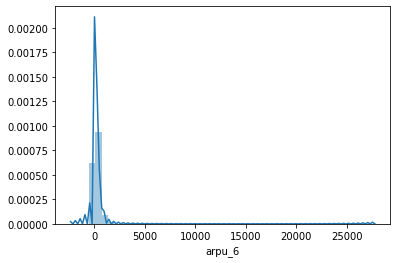

In [52]:
sns.distplot(churn.arpu_6)
churn.arpu_6.describe()

count    99999.000000
mean       261.645069
std        341.998630
min      -1899.505000
25%         62.685000
50%        176.849000
75%        353.466500
max      38805.617000
Name: arpu_9, dtype: float64

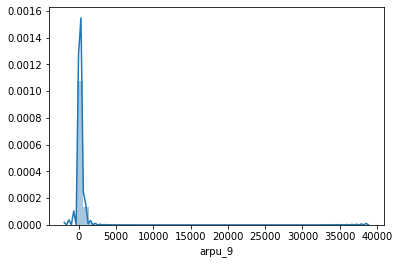

In [53]:
sns.distplot(churn.arpu_9)
churn.arpu_9.describe()

count    99999.000000
mean         7.558806
std          7.078405
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max        307.000000
Name: total_rech_num_6, dtype: float64

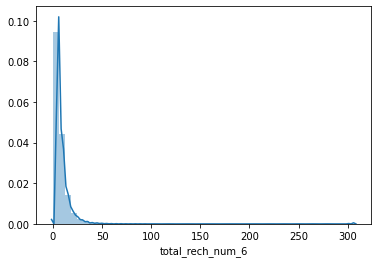

In [54]:
sns.distplot(churn.total_rech_num_6)
churn.total_rech_num_6.describe()

count    99999.000000
mean         6.893019
std          7.096261
min          0.000000
25%          3.000000
50%          5.000000
75%          9.000000
max        131.000000
Name: total_rech_num_9, dtype: float64

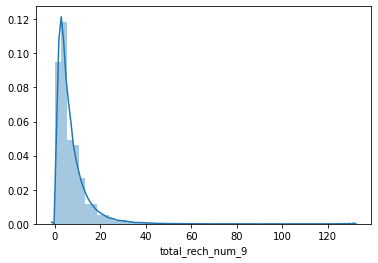

In [55]:
sns.distplot(churn.total_rech_num_9)
churn.total_rech_num_9.describe()

#### Observation:
##### Mean Average per user decline from June to September
##### Standard Deviation Increase 
##### It seems Maximum arpu Increase from Jun to Sep

{'boxes': [<matplotlib.lines.Line2D at 0x7f744384e908>],
 'caps': [<matplotlib.lines.Line2D at 0x7f744385e358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f744385edd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f744385ea58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f744384ec18>,
  <matplotlib.lines.Line2D at 0x7f744384ef98>]}

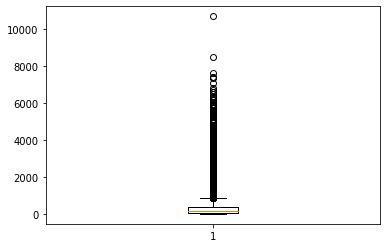

In [56]:
plt.boxplot(churn.total_og_mou_6)

{'boxes': [<matplotlib.lines.Line2D at 0x7f7443964a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f744388efd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f744388e588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f744388e630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7443964cf8>,
  <matplotlib.lines.Line2D at 0x7f7443964048>]}

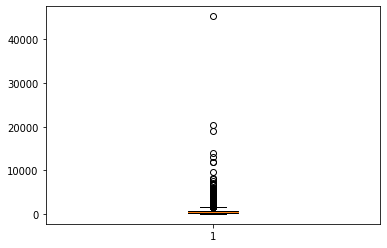

In [57]:
plt.boxplot(churn_filter.total_rech_amt_8)

### *Bivariate Analysis*

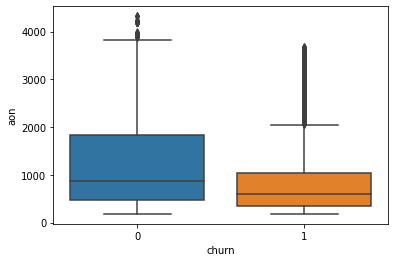

In [58]:
sns.boxplot(churn_filter.churn, churn_filter.aon)

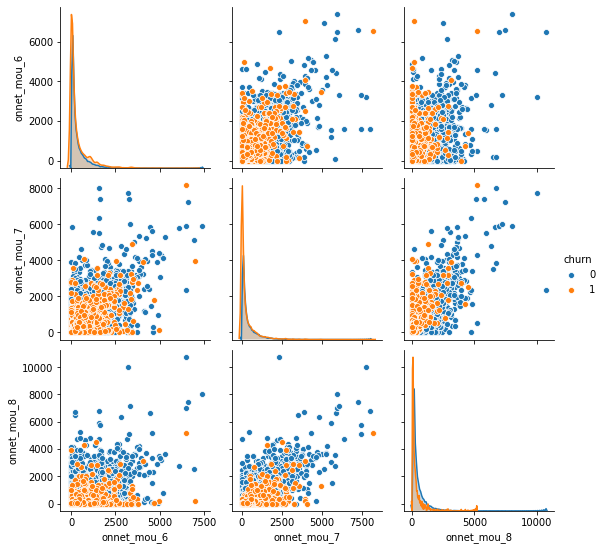

In [59]:
sns.pairplot(data=churn_filter[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn')

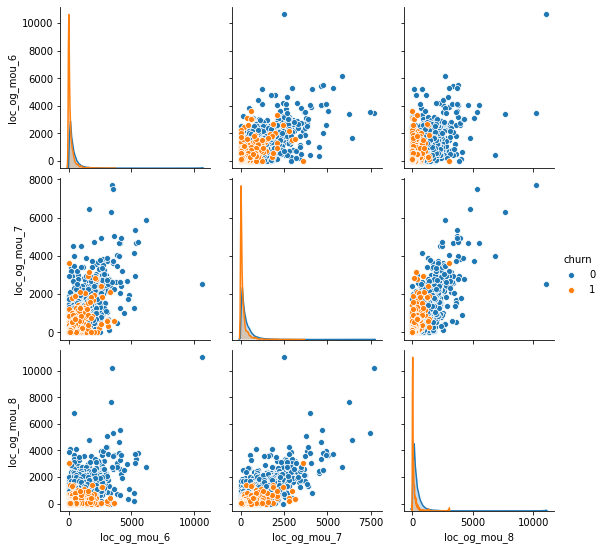

In [60]:
sns.pairplot(data=churn_filter[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn')

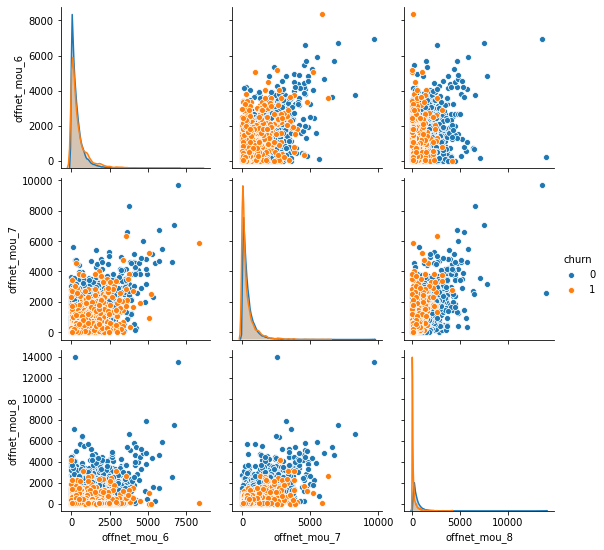

In [61]:
sns.pairplot(data=churn_filter[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn')

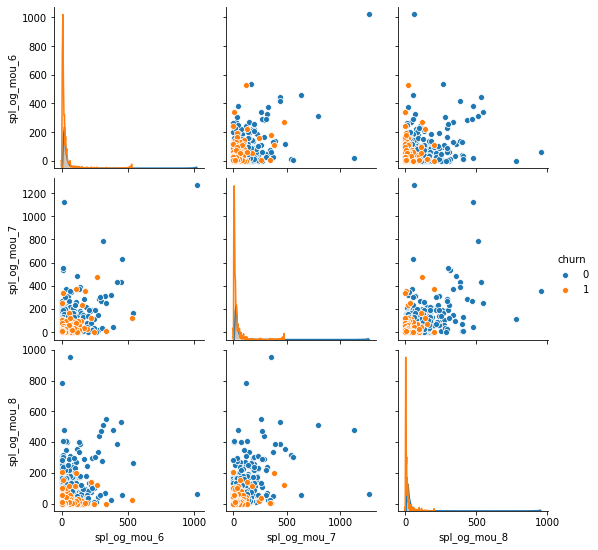

In [62]:
sns.pairplot(data=churn_filter[['spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','churn']],hue='churn')

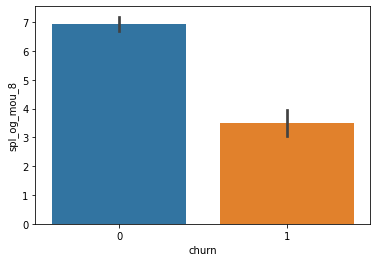

In [63]:
sns.barplot(churn_filter.churn, churn_filter.spl_og_mou_8)

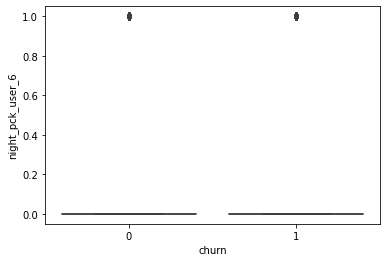

In [64]:
sns.boxplot(churn_filter.churn, churn_filter.night_pck_user_6)

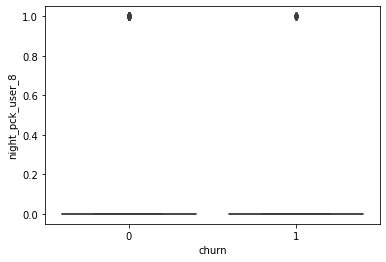

In [65]:
sns.boxplot(churn_filter.churn, churn_filter.night_pck_user_8)

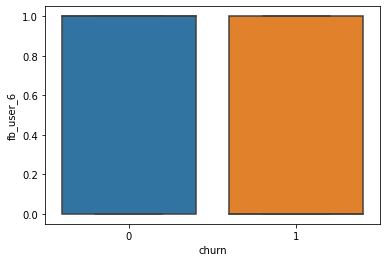

In [66]:
sns.boxplot(churn_filter.churn, churn_filter.fb_user_6 )

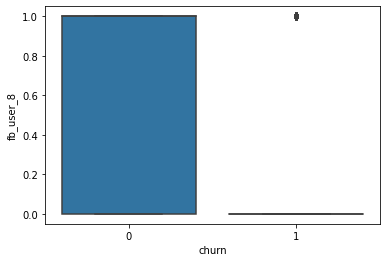

In [67]:
sns.boxplot(churn_filter.churn, churn_filter.fb_user_8 )

In [68]:
pd.crosstab(churn_filter.churn, churn_filter.night_pck_user_8, normalize='columns')*100

night_pck_user_8,0.0,1.0
churn,,
0,91.800405,97.360704
1,8.199595,2.639296


In [69]:
pd.crosstab(churn_filter.churn, churn_filter.fb_user_8, normalize='columns')*100

fb_user_8,0.0,1.0
churn,,
0,86.658593,97.568644
1,13.341407,2.431356


In [70]:
pd.crosstab(churn_filter.churn, churn_filter.sachet_2g_8, normalize='columns')*100

sachet_2g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,29.0,31.0,32.0,33.0,34.0,44.0
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,89.963172,95.016181,95.755771,97.497156,96.73913,98.231511,98.491379,98.662207,98.920863,99.492386,98.816568,100.0,99.009901,100.0,100.0,100.0,100.0,100.0,100.0,90.0,88.888889,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,10.036828,4.983819,4.244229,2.502844,3.26087,1.768489,1.508621,1.337793,1.079137,0.507614,1.183432,0.0,0.990099,0.0,0.0,0.0,0.0,0.0,0.0,10.0,11.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Avg. Incoming MOU per month Churn vs Non-Churn
churn_filter.groupby(['churn'])['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8'].mean()

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.131789,306.840677,299.096525
1,231.451344,182.907534,63.444342


In [72]:
# Avg. Outgoing MOU per month Churn vs Non-Churn
churn_filter.groupby(['churn'])['total_og_mou_6','total_og_mou_7','total_og_mou_8'].mean()

,total_og_mou_6,total_og_mou_7,total_og_mou_8
churn,,,
0,593.763075,628.442026,581.998003
1,791.678435,627.508218,209.361368


In [73]:
churn_filter.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,...,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_difference,onnet_mou_difference,offnet_mou_difference,roam_ic_mou_difference,roam_og_mou_difference,loc_og_mou_difference,std_og_mou_difference,isd_og_mou_difference,spl_og_mou_difference,total_og_mou_difference,loc_ic_mou_difference,std_ic_mou_difference,isd_ic_mou_difference,spl_ic_mou_difference,total_ic_mou_difference,total_rech_num_difference,total_rech_amt_difference,max_rech_amt_difference,total_rech_data_difference,max_rech_data_difference,av_rech_amt_data_difference,vol_2g_mb_difference,vol_3g_mb_difference,churn
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.0,0.0,0.0,558.490824,560.782203,508.597957,261.398759,268.180039,234.897853,374.808751,378.919461,336.647767,16.326745,12.803968,12.778681,26.866012,20.306792,20.185765,84.641238,85.814737,78.367254,163.739190,163.456907,152.537024,6.373508,6.445220,5.925555,1.593801,1.911031,1.736701,254.762227,255.725290,236.837819,166.223189,174.390177,148.810621,179.750082,188.108862,157.820084,1.817231,...,1.214026,1.054865,0.217759,0.229026,0.211026,0.209393,0.227492,0.202393,0.517483,0.524049,0.477084,1209.368754,169.138860,178.872765,158.523962,8.029788,-51.038557,-29.891546,-40.216339,-1.786676,-3.400637,-18.405939,-47.838930,-0.193139,0.135404,-67.437337,-8.573577,-3.402213,-0.309252,-0.013704,-13.430810,-1.812056,-76.249725,-10.598813,-0.138845,-6.467768,-13.085795,-19.896683,-5.733637,0.081364
std,0.0,0.0,0.0,460.640461,479.776947,501.961981,459.542626,479.871298,458.169838,481.907218,498.419864,481.211951,76.661144,76.092212,74.335933,116.566099,96.231749,104.790382,228.748870,240.488975,227.328088,249.890348,241.364053,233.313694,22.126196,21.942268,19.508718,6.309214,9.163325,7.217770,377.991520,375.103488,362.856481,403.881420,421.186824,397.498528,408.947269,433.578173,409.014199,12.009736,...,2.736158,2.535940,0.613199,0.659125,0.617549,0.985674,1.089929,1.100107,0.499703,0.499430,0.499483,957.677989,420.974354,443.544138,416.734860,52.378232,334.872321,307.137559,347.347976,66.013245,94.273529,212.436460,425.991326,13.755315,18.103188,502.630069,178.428603,98.126694,56.656569,0.175114,221.899902,6.755899,418.479122,136.893018,2.214561,78.343307,148.249896,256.114926,624.877555,0.273398
min,0.0,0.0,0.0,-2258.709000,-2014.045000

#*Outlier Treatment*

In [74]:
from pandas.api.types import is_numeric_dtype
import numpy as np
np.random.seed(42)

def remove_outlier(df):
    low = .1
    high = .99
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) 
             & (df[name] < quant_df.loc[high, name])]
    return df
    
#Call Outlier function.    
remove_outlier(churn_filter)
churn_filter.shape

(30001, 173)

In [75]:
churn_filter.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,...,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,arpu_difference,onnet_mou_difference,offnet_mou_difference,roam_ic_mou_difference,roam_og_mou_difference,loc_og_mou_difference,std_og_mou_difference,isd_og_mou_difference,spl_og_mou_difference,total_og_mou_difference,loc_ic_mou_difference,std_ic_mou_difference,isd_ic_mou_difference,spl_ic_mou_difference,total_ic_mou_difference,total_rech_num_difference,total_rech_amt_difference,max_rech_amt_difference,total_rech_data_difference,max_rech_data_difference,av_rech_amt_data_difference,vol_2g_mb_difference,vol_3g_mb_difference,churn
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,0.0,0.0,0.0,558.490824,560.782203,508.597957,261.398759,268.180039,234.897853,374.808751,378.919461,336.647767,16.326745,12.803968,12.778681,26.866012,20.306792,20.185765,84.641238,85.814737,78.367254,163.739190,163.456907,152.537024,6.373508,6.445220,5.925555,1.593801,1.911031,1.736701,254.762227,255.725290,236.837819,166.223189,174.390177,148.810621,179.750082,188.108862,157.820084,1.817231,...,1.214026,1.054865,0.217759,0.229026,0.211026,0.209393,0.227492,0.202393,0.517483,0.524049,0.477084,1209.368754,169.138860,178.872765,158.523962,8.029788,-51.038557,-29.891546,-40.216339,-1.786676,-3.400637,-18.405939,-47.838930,-0.193139,0.135404,-67.437337,-8.573577,-3.402213,-0.309252,-0.013704,-13.430810,-1.812056,-76.249725,-10.598813,-0.138845,-6.467768,-13.085795,-19.896683,-5.733637,0.081364
std,0.0,0.0,0.0,460.640461,479.776947,501.961981,459.542626,479.871298,458.169838,481.907218,498.419864,481.211951,76.661144,76.092212,74.335933,116.566099,96.231749,104.790382,228.748870,240.488975,227.328088,249.890348,241.364053,233.313694,22.126196,21.942268,19.508718,6.309214,9.163325,7.217770,377.991520,375.103488,362.856481,403.881420,421.186824,397.498528,408.947269,433.578173,409.014199,12.009736,...,2.736158,2.535940,0.613199,0.659125,0.617549,0.985674,1.089929,1.100107,0.499703,0.499430,0.499483,957.677989,420.974354,443.544138,416.734860,52.378232,334.872321,307.137559,347.347976,66.013245,94.273529,212.436460,425.991326,13.755315,18.103188,502.630069,178.428603,98.126694,56.656569,0.175114,221.899902,6.755899,418.479122,136.893018,2.214561,78.343307,148.249896,256.114926,624.877555,0.273398
min,0.0,0.0,0.0,-2258.709000,-2014.045000

# *Modeling*


In [0]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [77]:
churn_filter['churn'].dtype

dtype('int64')

In [0]:
X = churn_filter.drop("churn", axis = 1)
y = churn_filter.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 172)
(21000,)
(9001, 172)
(9001,)


# *Handle Class Imbalance using SMOTE*

y_train_count Not Churn: 19309
y_train_count Churn: 1691
Proportion y-train: 11.42 : 1


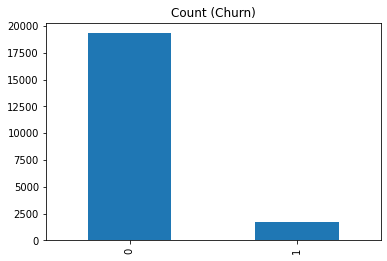

In [80]:
y_train_count = y_train.value_counts()
print('y_train_count Not Churn:', y_train_count[0])
print('y_train_count Churn:', y_train_count[1])

print('Proportion y-train:', round(y_train_count[0] / y_train_count[1], 2), ': 1')

y_train_count.plot(kind='bar', title='Count (Churn)')

In [81]:
#Data is highly imbalance so using SMOTE on test and train both

from imblearn.over_sampling import SMOTE 
smote = SMOTE(ratio='minority') 

X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train.ravel())
X_train =pd.DataFrame(X_train_sm, columns=X_train.columns)
y_train =pd.DataFrame(y_train_sm)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(38618, 172)
(38618, 1)
(9001, 172)
(9001,)


# *PCA - Principal Component Analysis*

In [82]:
pca = Pipeline([('scaler',StandardScaler()), ('reduce_dim', PCA())])
pca = pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)
churn_pca.shape

(38618, 172)

In [83]:
print(pd.Series(np.round(pca.steps[1][1].explained_variance_ratio_.cumsum(), 4)*100))

0        9.12
1       17.70
2       23.11
3       27.78
4       31.72
        ...  
167    100.00
168    100.00
169    100.00
170    100.00
171    100.00
Length: 172, dtype: float64


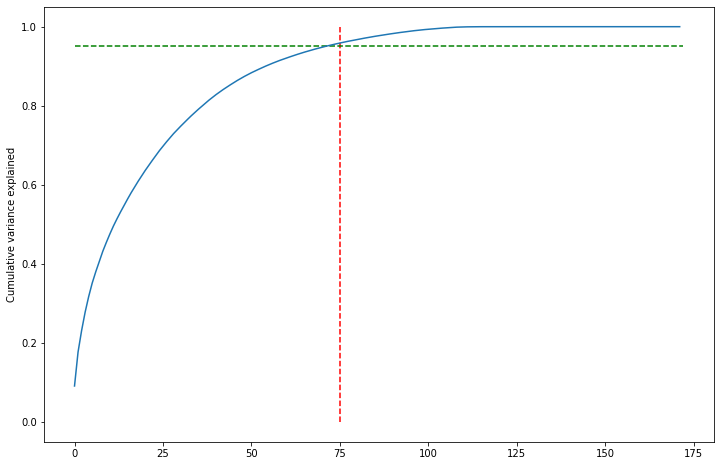

In [84]:
#plotting the cumulative variance against the number of components
var_cumu = np.cumsum(pca.steps[1][1].explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=172, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

# *PCA and Logistic Regression*

###### It seems 75 Feature will be to predict the model. Perform logistic regression using 75 components.

In [0]:
# PCA and Logistic Reqgression using 75 Components

PCA_com = 75
steps = [('scaler', StandardScaler()),
         ("reduce_dim", PCA(n_components=PCA_com)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]

pipe = Pipeline(steps)

In [86]:
#fit the Model on X_train, y_train
pipe.fit(X_train, y_train)

#Chek the score on train data
pipe.score(X_train, y_train)

0.8359314309389404

#*Evaluate the Model on Test Dataset*

In [87]:
from sklearn import metrics

# predict churn on test data
y_pred = pipe.predict(X_test)

# create and print onfusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# check sensitivity and specificity
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)

# Check classification accuracy and error
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# check area under curve
y_pred_prob = pipe.predict_proba(X_test)[:, 1]

#Check area under curve
auc_score = round(roc_auc_score(y_test, y_pred_prob),2)


outputseries = pd.Series([sensitivity,specificity,classification_accuracy,classification_error, auc_score],
                         index=['Sensitivity','Specificity','classification accuracy','classification error', 'Auc Score'])
output = pd.DataFrame(outputseries)
output.columns = [''] #blank header name
output.head()



Confusion Matrix: 
 [[6811 1440]
 [ 125  625]]


,
Sensitivity,0.833333
Specificity,0.825476
classification accuracy,0.826130
classification error,0.173870
Auc Score,0.890000


(9001,)

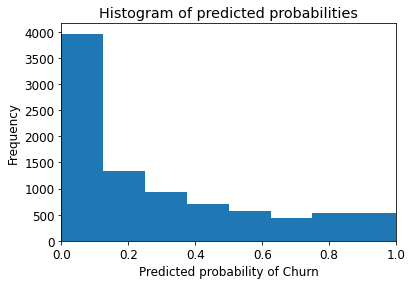

In [88]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Churn')
plt.ylabel('Frequency')
y_pred_prob.shape

#*HyperParameter Tuning PCA and Logistics Regression*

In [0]:
# PCA
pca = PCA()

logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

pipe = Pipeline(steps = [('scaler', StandardScaler()),
         ("pca", pca),
         ("logistic", logistic)
        ])
# specify number of folds 
n_folds = 5

#Specify number of components
n_components = [60, 80]

#Specify Penality 
penalty = ['l1', 'l2']

C = [0.1, 0.5, 1, 2, 3, 4, 5, 10]

# parameters to build the model on
parameters = dict(pca__n_components=n_components,
                      logistic__C=C,
                      logistic__penalty=penalty)
  
pca_model = GridSearchCV(estimator=pipe, param_grid=parameters, cv=n_folds,scoring="accuracy",verbose=1)

In [90]:
#Fit the Model
pca_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.

In [91]:
# scores of GridSearch CV
scores = pca_model.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.711816,0.001334,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,0.806485,0.010875,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,0.945496,0.010342,0.019403,0.000445,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.688244,0.683325,0.687079,0.685096,0.683672,0.685483,0.001911,16
3,1.136977,0.020538,0.021545,0.000263,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.697566,0.695365,0.696530,0.697786,0.691830,0.695815,0.002170,8
4,0.711165,0.010627,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27


In [92]:
    # View The Best Parameters
    print('Best Penalty:', pca_model.best_estimator_.get_params()['logistic__penalty'])
    print('Best C:', pca_model.best_estimator_.get_params()['logistic__C'])
    print('Best Number Of Components:', pca_model.best_estimator_.get_params()['pca__n_components'])
    print('Param: '); print(pca_model.best_estimator_.get_params()['logistic'])
    print('AUC Score: ', pca_model.best_score_)

Best Penalty: l2
Best C: 10
Best Number Of Components: 80
Param: 
LogisticRegression(C=10, class_weight={0: 0.1, 1: 0.9}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC Score:  0.6986638202231821


In [93]:
# predict churn on test data
y_pred = pca_model.predict(X_test)

# create and print onfusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# check sensitivity and specificity
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)

# Check classification accuracy and error
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# check area under curve
y_pred_prob = pca_model.predict_proba(X_test)[:, 1]

#Check area under curve
auc_score = round(roc_auc_score(y_test, y_pred_prob),2)


outputseries = pd.Series([sensitivity,specificity,classification_accuracy,classification_error, auc_score],
                         index=['Sensitivity','Specificity','classification accuracy','classification error', 'Auc Score'])
output = pd.DataFrame(outputseries)
output.columns = [''] #blank header name
output.head()

Confusion Matrix: 
 [[3436 4815]
 [  36  714]]


,
Sensitivity,0.952000
Specificity,0.416434
classification accuracy,0.461060
classification error,0.538940
Auc Score,0.880000


#*Decision Tree*

In [0]:
# specify number of folds for k-fold CV
n_folds = 5

# instantiate the model
dtree = DecisionTreeClassifier(class_weight={0:0.1, 1: 0.9})

# parameters to build the model on
parameters = {'max_depth': range(4, 8, 12),
              'min_samples_leaf': range(50, 150, 50),
              'min_samples_split': range(50, 150, 50),
              'criterion': ["entropy", "gini"]
              }


# fit tree on training data
dtree_model = GridSearchCV(estimator=dtree, param_grid=parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1)

In [95]:
dtree_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_g

In [96]:
 print('Best Hyperparameter: ', dtree_model.best_params_)
 print('AUC Score: ', dtree_model.best_score_)

Best Hyperparameter:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 50}
AUC Score:  0.7717386135275713


In [97]:
# predict churn on test data
y_pred = dtree_model.predict(X_test)

# create and print onfusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# check sensitivity and specificity
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)

# Check classification accuracy and error
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# check area under curve
y_pred_prob = dtree_model.predict_proba(X_test)[:, 1]

#Check area under curve
auc_score = round(roc_auc_score(y_test, y_pred_prob),2)


outputseries = pd.Series([sensitivity,specificity,classification_accuracy,classification_error, auc_score],
                         index=['Sensitivity','Specificity','classification accuracy','classification error', 'Auc Score'])
output = pd.DataFrame(outputseries)
output.columns = [''] #blank header name
output.head()

Confusion Matrix: 
 [[4676 3575]
 [  43  707]]


,
Sensitivity,0.942667
Specificity,0.566719
classification accuracy,0.598045
classification error,0.401955
Auc Score,0.900000


In [0]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"max_features":[4,8,12], 
              'min_samples_leaf': range(50, 150, 50),
              'min_samples_split': range(50, 150, 50),
             }

# instantiate the model
rf = RandomForestClassifier(class_weight={0:0.1, 1: 0.9})


# fit tree on training data
rf_model = GridSearchCV(estimator=rf, param_grid=parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1)

In [99]:
rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 12.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                       

In [100]:
print('Best Hyperparameter: ', rf_model.best_params_)
print('AUC Score: ', rf_model.best_score_)
print(rf_model.best_estimator_)

Best Hyperparameter:  {'max_features': 12, 'min_samples_leaf': 50, 'min_samples_split': 50}
AUC Score:  0.8622920144171106
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features=12, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [101]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create and print onfusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# check sensitivity and specificity
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)

# Check classification accuracy and error
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

#Check area under curve
auc_score = round(roc_auc_score(y_test, y_pred_prob),2)


outputseries = pd.Series([sensitivity,specificity,classification_accuracy,classification_error, auc_score],
                         index=['Sensitivity','Specificity','classification accuracy','classification error', 'Auc Score'])
output = pd.DataFrame(outputseries)
output.columns = [''] #blank header name
output.head()

Confusion Matrix: 
 [[6249 2002]
 [  68  682]]


,
Sensitivity,0.909333
Specificity,0.757363
classification accuracy,0.770026
classification error,0.229974
Auc Score,0.920000


#*Build a final Random Forest Model using chosen Hyper Parameters*

In [0]:
# model with the best hyperparameters

# instantiate the model
rfc = RandomForestClassifier(bootstrap=True,
                            n_estimators=100,
                            class_weight={0:0.1, 1: 0.9},
                            max_depth =10,
                            max_features = 12,
                            min_samples_leaf = 50,
                            min_samples_split = 50,
                           )



In [103]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=10, max_features=12, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=50, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [104]:
# predict churn on test data
y_pred = rfc.predict(X_test)

# create and print onfusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# check sensitivity and specificity
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)

# Check classification accuracy and error
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# check area under curve
y_pred_prob = rfc.predict_proba(X_test)[:, 1]

#Check area under curve
auc_score = round(roc_auc_score(y_test, y_pred_prob),2)


outputseries = pd.Series([sensitivity,specificity,classification_accuracy,classification_error, auc_score],
                         index=['Sensitivity','Specificity','classification accuracy','classification error', 'Auc Score'])
output = pd.DataFrame(outputseries)
output.columns = [''] #blank header name
output.head()

Confusion Matrix: 
 [[6017 2234]
 [  58  692]]


,
Sensitivity,0.922667
Specificity,0.729245
classification accuracy,0.745362
classification error,0.254638
Auc Score,0.920000


#*Final Choice of Model*

**Recall or Sensitivity** is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives. 

| Model/Metrics                         | Train   | Test   |
|---------------------------------------|---------|--------|
| Logistic Regression         |         |        |
| Roc_auc_score                         | 90.0%  | 89.0% |
| Sensitivity/Recall                    | 98.3%  | 96.2% |
| Specificity                           | 39.3%  | 39.6% |
| DecisionTree                |         |        |
| Roc_auc_score                         | 93.0%  | 90.0% |
| Sensitivity/Recall                    | 97.8%  | 93.2% |
| Specificity                           | 55.2%  | 54.2% |
| Random Forest               |         |        |
| Roc_auc_score                         | 98.0%  | 92.0% |
| Sensitivity/Recall                    | 99.8%  | 92.3% |
| Specificity                           | 73.6%  | 73.1% |

Overall, the **Logistic Regression** model with probability cut-off = 0.45, performs best. It achieved the **best recall accuracy of 96.2%** for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it. 

From the Tree Family, the Random Forest overfitted the data slightly while obtaining 92.3% recall accuracy on test data. 
The Decision Tree avoided overfitting and obtained 93.2% recall accuracy on test data. 

#*Identifying relevant churn features.*

We will use an instance of Random Forest classifier to identify the features most relevant to churn. 

# *Feature Importance*

In [105]:
# predictors
features = churn_filter.drop('churn', axis=1).columns

# feature_importance
importance = rfc.feature_importances_

# create dataframe
data = {'col_name': features, 'imp_%age': importance*100}
feature_importance = pd.DataFrame(data)

# sort features
feature_importance = feature_importance.sort_values('imp_%age', ascending=False).reset_index(drop=True)
feature_importance

,col_name,imp_%age
0,total_ic_mou_8,5.998149
1,roam_ic_mou_8,4.566958
2,roam_og_mou_8,4.564729
3,fb_user_8,4.206752
4,loc_ic_mou_8,3.412366
...,...,...
167,std_ic_t2o_mou_6,0.000000
168,std_ic_t2o_mou_7,0.000000
169,std_ic_t2o_mou_8,0.000000
170,std_og_t2o_mou,0.000000


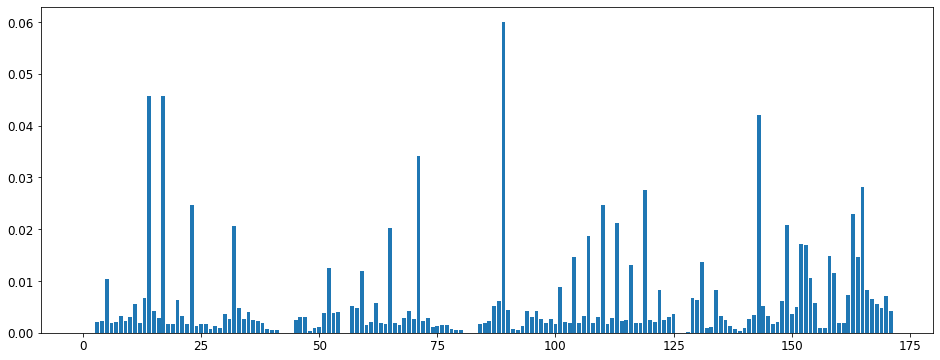

In [106]:
# plot
plt.figure(figsize=(16,6))
plt.bar(range(len(rfc.feature_importances_)), rfc.feature_importances_)
plt.show()

#*Logistics Regression without PCA*

In [107]:
#Get the Top 25 columns for further processing

top_n = 30
top_features = feature_importance.col_name[0:top_n]
cols = top_features.tolist()
top_features

0                total_ic_mou_8
1                 roam_ic_mou_8
2                 roam_og_mou_8
3                     fb_user_8
4                  loc_ic_mou_8
5     total_rech_amt_difference
6            av_rech_amt_data_8
7              loc_og_t2m_mou_8
8            last_day_rch_amt_8
9       total_ic_mou_difference
10            total_rech_data_8
11              arpu_difference
12                 loc_og_mou_8
13             loc_ic_t2m_mou_8
14               max_rech_amt_8
15       roam_ic_mou_difference
16       roam_og_mou_difference
17      total_og_mou_difference
18    total_rech_num_difference
19             total_rech_amt_8
20                 monthly_2g_8
21              max_rech_data_8
22                 spl_og_mou_7
23               total_og_mou_8
24        loc_ic_mou_difference
25        loc_og_mou_difference
26                       arpu_8
27             total_rech_num_8
28      max_rech_amt_difference
29                  sachet_2g_8
Name: col_name, dtype: object

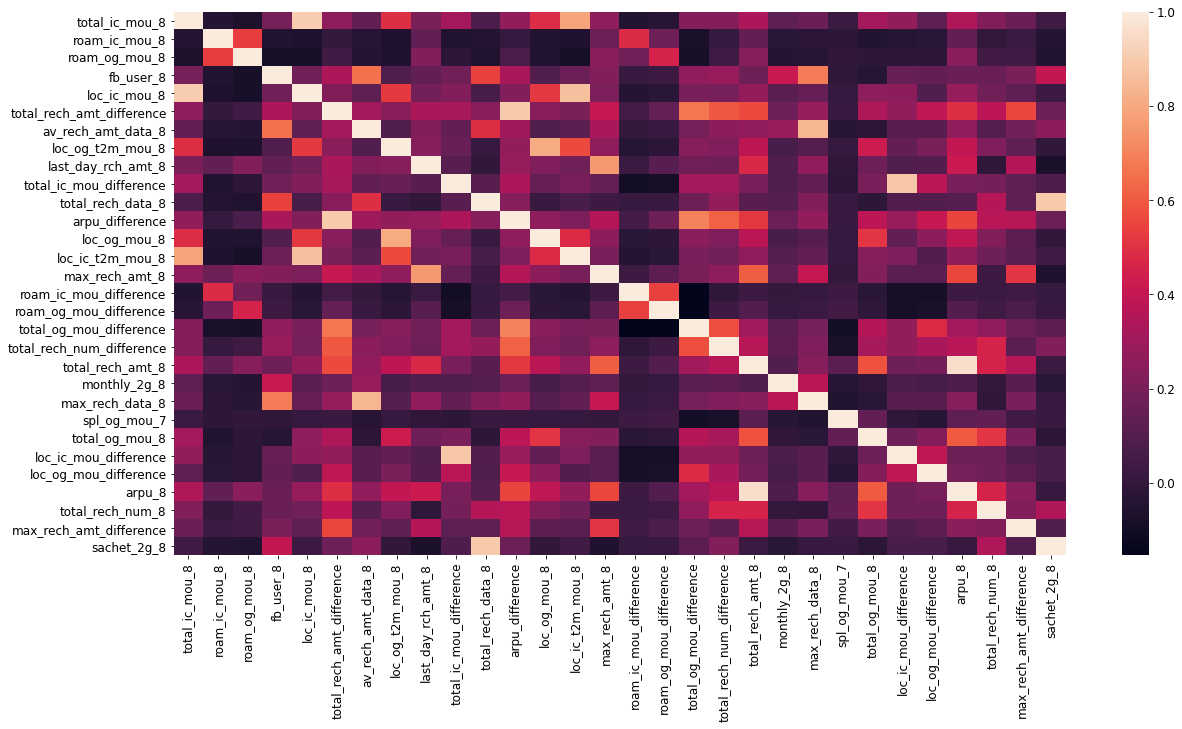

In [108]:
#Plot correlation Matrix 
plt.figure(figsize = (20,10))   
sns.heatmap(X_train[cols].corr())

In [0]:
#Run Logistics Regression Using Selected Variables:
X_train_lr = X_train[cols]
X_test_lr = X_test[cols]

In [0]:
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

pipe = Pipeline(steps = [('scaler', StandardScaler()),
         ("logistic", logistic)
        ])
# specify number of folds 
n_folds = 5

#Specify number of components
n_components = [60, 80]

#Specify Penality 
penalty = ['l1', 'l2']

C = [0.1, 0.5, 1, 2, 3, 4, 5, 10]

# parameters to build the model on
parameters = dict(logistic__C=C,
                      logistic__penalty=penalty)
  
log_model = GridSearchCV(estimator=pipe, param_grid=parameters, cv=n_folds,scoring="accuracy",verbose=1)

In [111]:
log_model.fit(X_train_lr, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   16.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
  

In [112]:
# predict
predictions = log_model.predict(X_test_lr)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.34      0.51      8251
           1       0.12      0.96      0.21       750

    accuracy                           0.40      9001
   macro avg       0.55      0.65      0.36      9001
weighted avg       0.92      0.40      0.49      9001



In [113]:
# predict churn on test data
y_pred = log_model.predict(X_test_lr)

# create and print onfusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# check sensitivity and specificity
sensitivity = TP / float(FN + TP)
specificity = TN / (TN + FP)

# Check classification accuracy and error
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_error = (FP + FN) / float(TP + TN + FP + FN)

# check area under curve
y_pred_prob = log_model.predict_proba(X_test_lr)[:, 1]

#Check area under curve
auc_score = round(roc_auc_score(y_test, y_pred_prob),2)


outputseries = pd.Series([sensitivity,specificity,classification_accuracy,classification_error, auc_score],
                         index=['Sensitivity','Specificity','classification accuracy','classification error', 'Auc Score'])
output = pd.DataFrame(outputseries)
output.columns = [''] #blank header name
output.head()

Confusion Matrix: 
 [[2844 5407]
 [  27  723]]


,
Sensitivity,0.964000
Specificity,0.344685
classification accuracy,0.396289
classification error,0.603711
Auc Score,0.890000


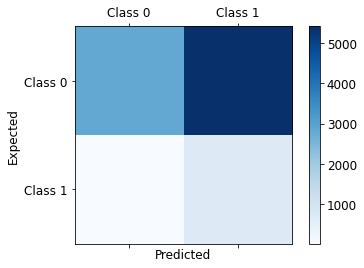

In [114]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

## Business Recommendation:

##### Telecom company needs to work on roaming rates. They should provide good roaming offer to retain the customers.
##### Telecom company need to take care of Local, Std call rate.
##### They should provide attractive offers for night pack, 2G and 3G Internet Sachets etc.
